In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

from write_read_cache import store_data, read_data

cache_folder = "cache"


In [57]:
# Convert leakage current measurment from ADC to nA
LSB = 1.72 * 10 ** -3  # LSB
R = 223.7 * 10 ** 3  # H = 0
SH_gain = 3.87  # Sample and hold gain


def get_leakage(leak_code):
    V_I = (1024 - leak_code) * LSB
    I = V_I / (SH_gain * 10 * R)
    I = I * 10 ** 9  # Converto to nA

    return abs(I)


In [15]:
# LEAKAGE CURRENT

# Import leakage current sum for all channels
# -50C, 3mbar
leak_m50C_3mbar_allch = pd.read_csv(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\leakage_1_T_-50C_p_03_mbar.txt",
    comment="#",
    sep="\t",
    header=None,
)
store_data(leak_m50C_3mbar_allch, "leak_m50C_3mbar_allch", cache_folder)

# -50C, 6mbar
leak_m50C_6mbar_allch = pd.read_csv(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\leakage_3_T_-50C_p_06_mbar.txt",
    comment="#",
    sep="\t",
    header=None,
)
store_data(leak_m50C_6mbar_allch, "leak_m50C_6mbar_allch", cache_folder)

# -50C, 10mbar
leak_m50C_10mbar_allch = pd.read_csv(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\leakage_6_T_-50C_p_10_mbar.txt",
    comment="#",
    sep="\t",
    header=None,
)
store_data(leak_m50C_10mbar_allch, "leak_m50C_10mbar_allch", cache_folder)

# -40C, 3mbar
leak_m40C_3mbar_allch = pd.read_csv(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\leakage_7_T_-40C_p_03_mbar.txt",
    comment="#",
    sep="\t",
    header=None,
)
store_data(leak_m40C_3mbar_allch, "leak_m40C_3mbar_allch", cache_folder)

# 0C, 3mbar
leak_m0C_3mbar_allch = pd.read_csv(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\leakage_8_T_0C_p_03_mbar.txt",
    comment="#",
    sep="\t",
    header=None,
)
store_data(leak_m0C_3mbar_allch, "leak_m0C_3mbar_allch", cache_folder)


-50 °C, 3 mbar:  16.656633387969997
-50 °C, 6 mbar:  15.442109968708078
-50 °C, 10 mbar:  14.167982913624382
-40 °C, 3 mbar:  40.24397754929718
0 °C, 3 mbar:  203.2483981522873


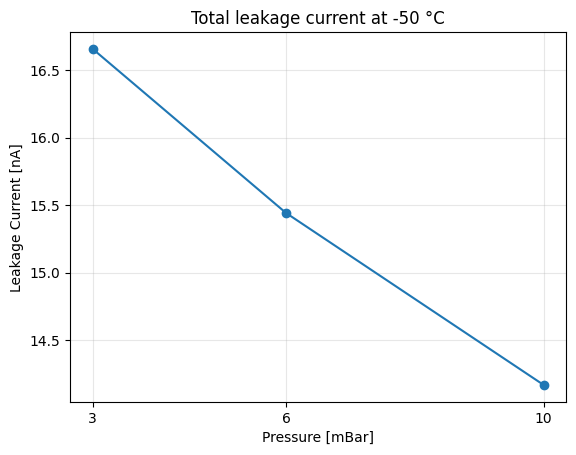

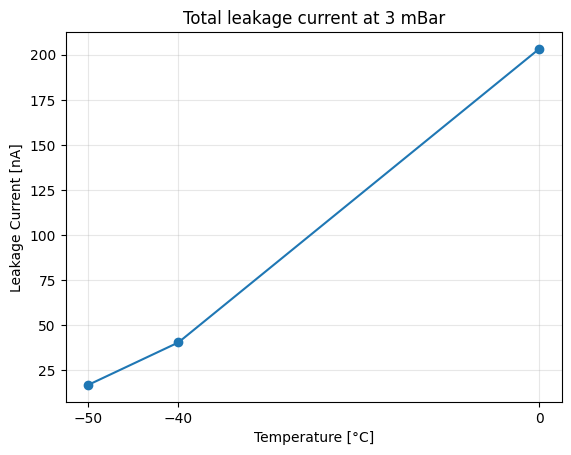

In [83]:
# Read data stored in cache
leak_m50C_3mbar_allch = read_data("leak_m50C_3mbar_allch", cache_folder)
leak_m50C_6mbar_allch = read_data("leak_m50C_6mbar_allch", cache_folder)
leak_m50C_10mbar_allch = read_data("leak_m50C_10mbar_allch", cache_folder)
leak_m40C_3mbar_allch = read_data("leak_m40C_3mbar_allch", cache_folder)
leak_m0C_3mbar_allch = read_data("leak_m0C_3mbar_allch", cache_folder)

# Plot leakage sum over all channels at -50 and 3, 6, and 10 mbar
leak_m50C_3mbar_mean = get_leakage(np.mean(leak_m50C_3mbar_allch.iloc[:, 1]))
leak_m50C_6mbar_mean = get_leakage(np.mean(leak_m50C_6mbar_allch.iloc[:, 1]))
leak_m50C_10mbar_mean = get_leakage(np.mean(leak_m50C_10mbar_allch.iloc[:, 1]))
leak_m40C_3mbar_mean = get_leakage(np.mean(leak_m40C_3mbar_allch.iloc[:, 1]))
leak_m0C_3mbar_mean = get_leakage(np.mean(leak_m0C_3mbar_allch.iloc[:, 1]))

print("-50 °C, 3 mbar: ", str(leak_m50C_3mbar_mean))
print("-50 °C, 6 mbar: ", str(leak_m50C_6mbar_mean))
print("-50 °C, 10 mbar: ", str(leak_m50C_10mbar_mean))
print("-40 °C, 3 mbar: ", str(leak_m40C_3mbar_mean))
print("0 °C, 3 mbar: ", str(leak_m0C_3mbar_mean))

# Leakage current at -50C and 3, 6, 10 mbar
pressures = [3, 6, 10]  # mbar
temperatures = [-50, -40, 0] # celsius
currents_m50_allpress = [
    leak_m50C_3mbar_mean,
    leak_m50C_6mbar_mean,
    leak_m50C_10mbar_mean,
]
currents_alltemps_3mbar = [
    leak_m50C_3mbar_mean,
    leak_m40C_3mbar_mean,
    leak_m0C_3mbar_mean,
]

plt.clf()
plt.plot(pressures, currents_m50_allpress, "-o")
plt.xticks(pressures)
plt.xlabel("Pressure [mBar]")
plt.ylabel("Leakage Current [nA]")
plt.title("Total leakage current at -50 °C")
plt.grid(alpha=0.3)
plt.show()

plt.clf()
plt.plot(temperatures, currents_alltemps_3mbar, "-o")
plt.xticks(temperatures)
plt.xlabel("Temperature [°C]")
plt.ylabel("Leakage Current [nA]")
plt.title("Total leakage current at 3 mBar")
plt.grid(alpha=0.3)
plt.show()


In [72]:
# Import leakage current measurements per channel with automated test

channels = range(0, 32)

# Dataframe for storing leakage current values for all channels at all pressures and temperatures
leak_df = pd.DataFrame(columns=["temperature", "pressure", "ch", "leakage"])

# -50C, 3mbar, single channels
leak_m50C_3mbar_single_ch_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\3_leakage_auto_T_-55C_P_3mbar"
leak_m50C_3mbar_single_ch_filepath = join(leak_m50C_3mbar_single_ch_filepath, "data")

temperature = -50  # celsius
pressure = 3  # mBar

for ch in channels:
    leak_m50C_3mbar_single_ch_filepath_ch_data = join(
        leak_m50C_3mbar_single_ch_filepath, "HK_Leakage_ch" + str(ch) + ".dat"
    )

    ch_leak_raw = pd.read_csv(
        leak_m50C_3mbar_single_ch_filepath_ch_data,
        comment="#",
        sep="\t",
        header=None,
    )

    ch_leak = get_leakage(np.mean(ch_leak_raw.iloc[:, 1]))

    row_to_append = pd.DataFrame(
        {
            "temperature": [temperature],
            "pressure": [pressure],
            "ch": [ch],
            "leakage": [ch_leak],
        }
    )
    leak_df = pd.concat([leak_df, row_to_append])

store_data(leak_df, "leak_df", cache_folder)

# -50C, 6mbar, single channels
leak_m50C_3mbar_single_ch_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\7_leakage_auto_T_-55C_P_6mbar"
leak_m50C_3mbar_single_ch_filepath = join(leak_m50C_3mbar_single_ch_filepath, "data")

temperature = -50  # celsius
pressure = 6  # mBar

for ch in channels:
    leak_m50C_3mbar_single_ch_filepath_ch_data = join(
        leak_m50C_3mbar_single_ch_filepath, "HK_Leakage_ch" + str(ch) + ".dat"
    )

    ch_leak_raw = pd.read_csv(
        leak_m50C_3mbar_single_ch_filepath_ch_data,
        comment="#",
        sep="\t",
        header=None,
    )

    ch_leak = get_leakage(np.mean(ch_leak_raw.iloc[:, 1]))

    row_to_append = pd.DataFrame(
        {
            "temperature": [temperature],
            "pressure": [pressure],
            "ch": [ch],
            "leakage": [ch_leak],
        }
    )
    leak_df = pd.concat([leak_df, row_to_append])

store_data(leak_df, "leak_df", cache_folder)

# -50C, 10mbar, single channels
leak_m50C_3mbar_single_ch_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\11_leakage_auto_T_-55C_P_10mbar"
leak_m50C_3mbar_single_ch_filepath = join(leak_m50C_3mbar_single_ch_filepath, "data")

temperature = -50  # celsius
pressure = 10  # mBar

for ch in channels:
    leak_m50C_3mbar_single_ch_filepath_ch_data = join(
        leak_m50C_3mbar_single_ch_filepath, "HK_Leakage_ch" + str(ch) + ".dat"
    )

    ch_leak_raw = pd.read_csv(
        leak_m50C_3mbar_single_ch_filepath_ch_data,
        comment="#",
        sep="\t",
        header=None,
    )

    ch_leak = get_leakage(np.mean(ch_leak_raw.iloc[:, 1]))

    row_to_append = pd.DataFrame(
        {
            "temperature": [temperature],
            "pressure": [pressure],
            "ch": [ch],
            "leakage": [ch_leak],
        }
    )
    leak_df = pd.concat([leak_df, row_to_append])

store_data(leak_df, "leak_df", cache_folder)


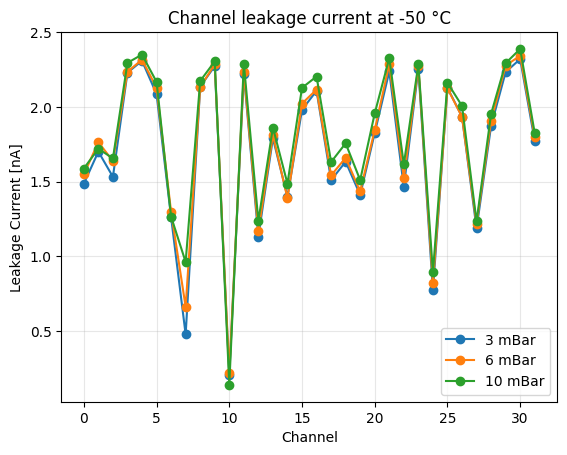

In [82]:
# Read leakage for all channels and make plot
leak_df = read_data("leak_df", cache_folder)
channels = range(0, 32)

plt.clf()
# -50C, 3mbar
plt.plot(
    channels,
    leak_df[(leak_df["temperature"] == -50) & (leak_df["pressure"] == 3)]["leakage"],
    "-o",
    label="3 mBar",
)
# -50C, 6mbar
plt.plot(
    channels,
    leak_df[(leak_df["temperature"] == -50) & (leak_df["pressure"] == 6)]["leakage"],
    "-o",
    label="6 mBar",
)
# -50C, 10mbar
plt.plot(
    channels,
    leak_df[(leak_df["temperature"] == -50) & (leak_df["pressure"] == 10)]["leakage"],
    "-o",
    label="10 mBar",
)
plt.xlabel("Channel")
plt.ylabel("Leakage Current [nA]")
plt.title("Channel leakage current at -50 °C")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
